In [1]:
import cv2
import os
import random

import matplotlib.pyplot as plt
import numpy as np

from imageio import imread, imsave
from skimage.color import rgb2gray

from skimage.filters import threshold_otsu, try_all_threshold
from skimage.filters import gaussian

from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.filters import gaussian
from skimage.filters import threshold_minimum, threshold_isodata, threshold_li,\
                            threshold_mean, threshold_triangle, threshold_yen
from skimage.feature import canny

from matplotlib import cm

from IPython.display import clear_output

In [2]:
dataset_dir = "./DATA_PHOTOS"

# load train/test datasets
train_dataset_len = 16
train_dataset = list()
for i in range(1, train_dataset_len + 1):
    train_dataset.append(imread(os.path.join(dataset_dir, str(i) + ".jpg")))
    
test_dataset_len = 6
test_dataset = list()
for i in range(train_dataset_len + 1, train_dataset_len + test_dataset_len + 1):
    test_dataset.append(imread(os.path.join(dataset_dir, str(i) + ".jpg")))

## Try to find the door

#### Hough transform

In [3]:
def show_hough_transform(image):
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))

    canny_image = canny(image, sigma=2.5)
    h, theta, d = hough_line(canny_image)

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()
    
    ax[1].imshow(canny_image, cmap='gray')
    ax[1].set_title('Canny')
    ax[1].set_axis_off()

    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    
    return fig

### Collect filters data on train dataset

=======================================16/16=======================================


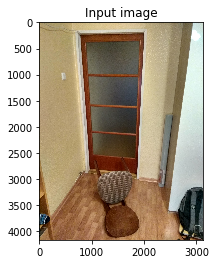

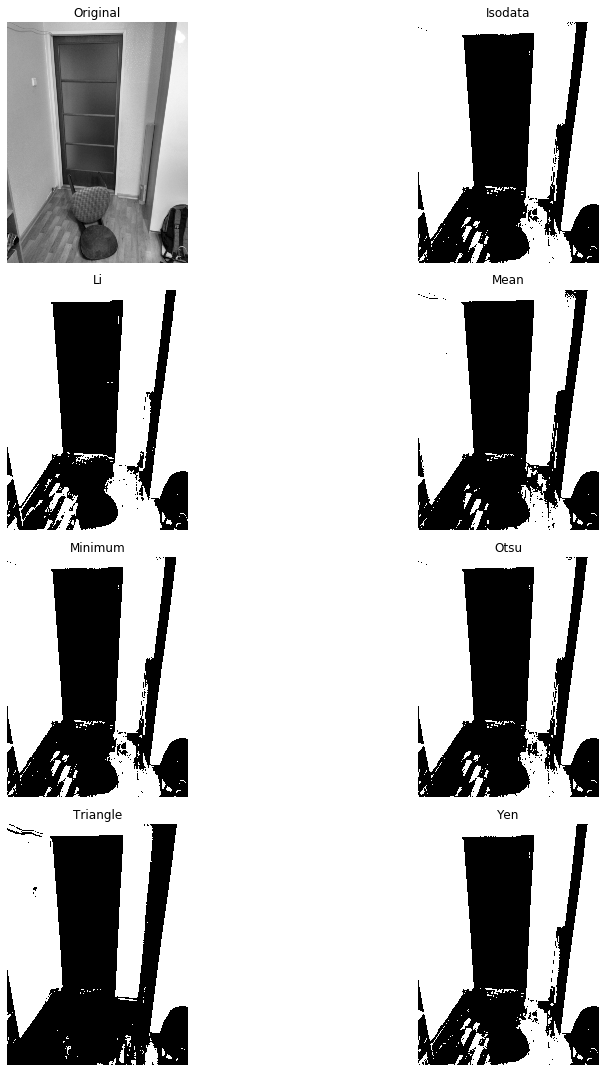

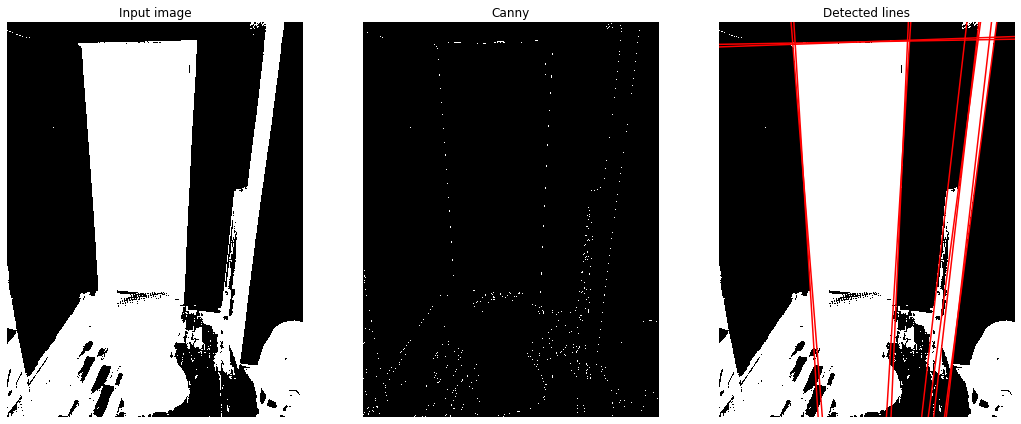

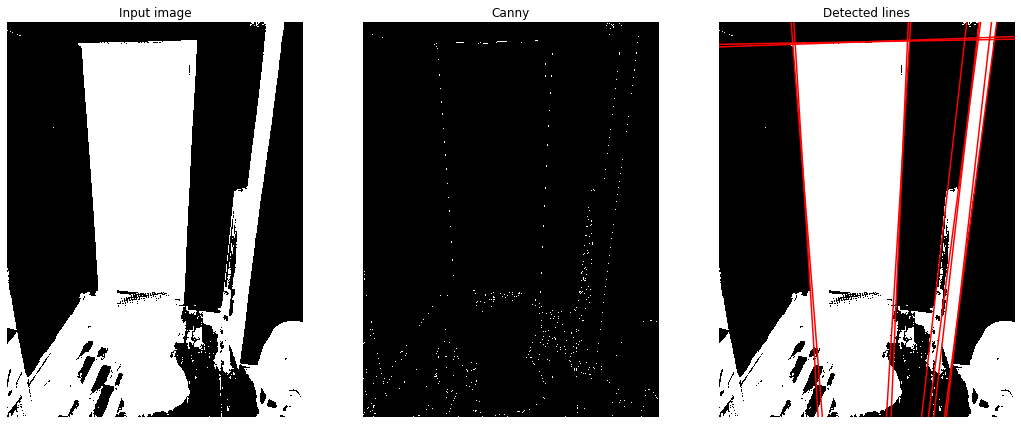

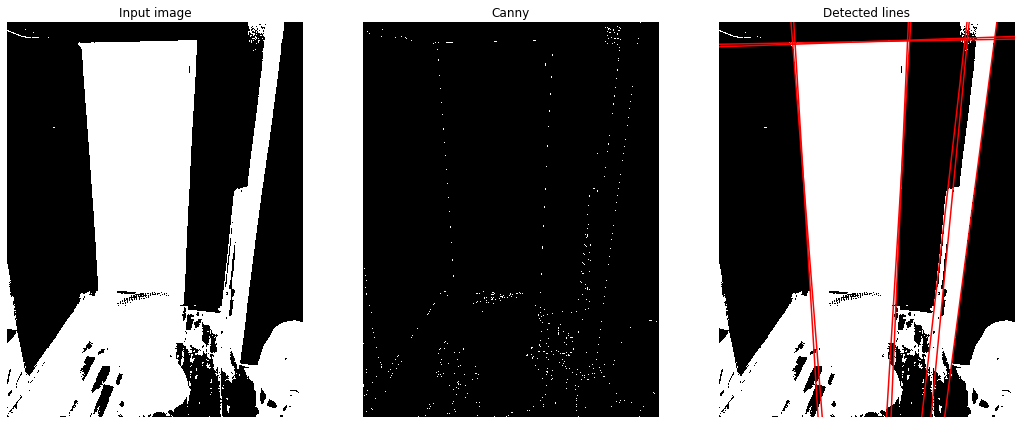

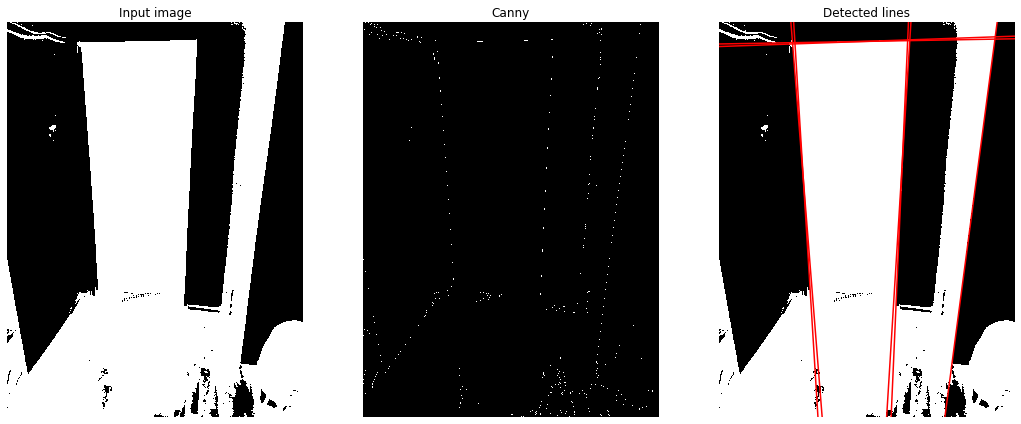

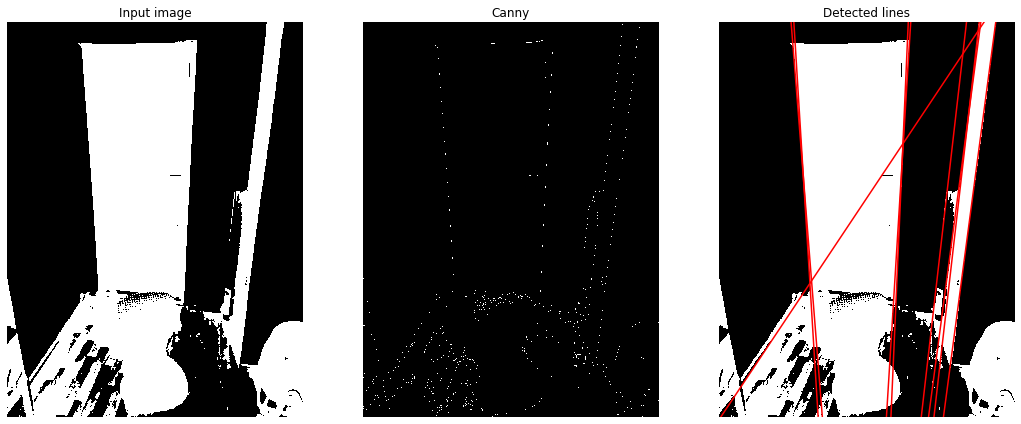

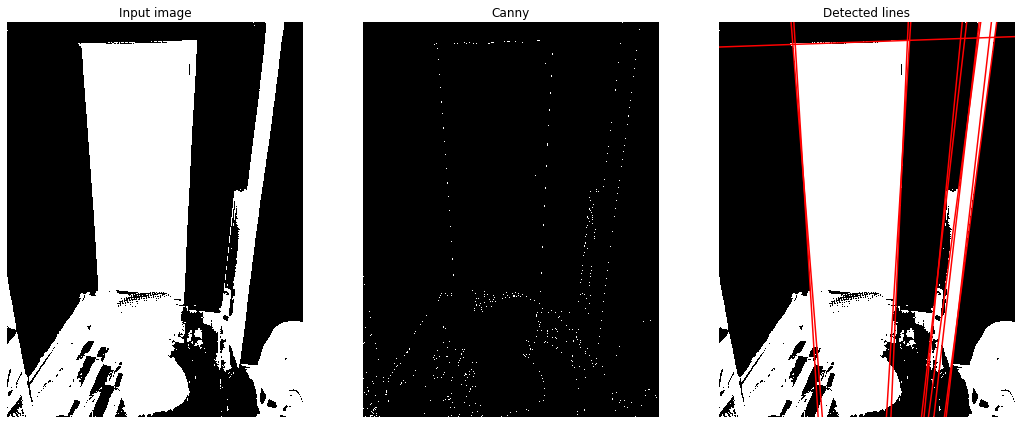

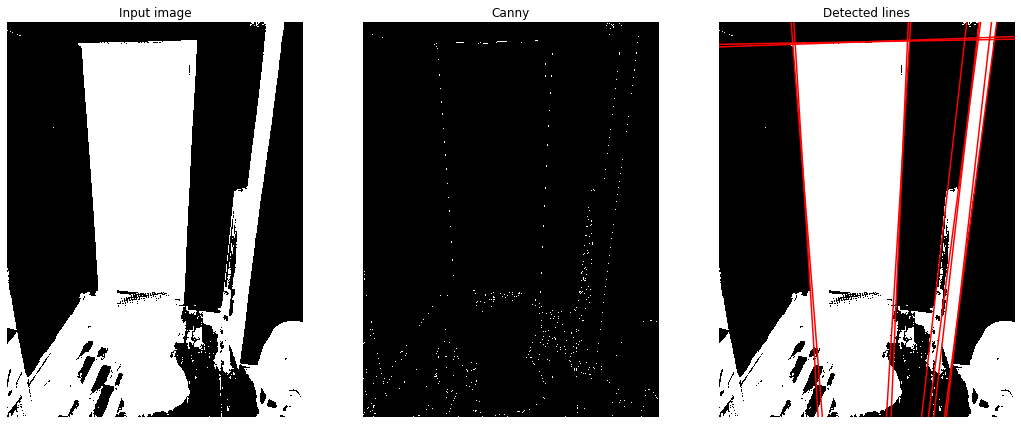

In [4]:
collected_data_dir = "./COLLECTED_DATA/FILTERS"
if not os.path.exists(collected_data_dir):
    os.makedirs(collected_data_dir)
    
for idx, train_img in enumerate(train_dataset):    
    clear_output()
    plt.close('all')
    
    print('=======================================', end='')
    print('%s/%s' % (idx + 1, len(train_dataset)), end='')
    print('=======================================')
    
    train_img_output_dir = os.path.join(collected_data_dir, "IMAGE_" + str(idx))
    if not os.path.exists(train_img_output_dir):
        os.makedirs(train_img_output_dir)
        
    # the image
    plt.figure()
    plt.imshow(train_img)
    plt.axis()
    plt.title('Input image')
    plt.savefig(os.path.join(train_img_output_dir, "train_img.png"))
    
    # all_thresholds
    train_img_blur = gaussian(train_img, sigma=3.5, multichannel=True)
    train_img_blur_gray = rgb2gray(train_img_blur)

    fig, ax = try_all_threshold(train_img_blur_gray, figsize=(15, 15), verbose=False)
    fig.savefig(os.path.join(train_img_output_dir, "all_thresholds.png"))
    
    # hough result on otsu and minimum filters
    train_img_otsu_filter = train_img_blur_gray <= threshold_otsu(train_img_blur_gray)
    fig = show_hough_transform(train_img_otsu_filter)
    fig.savefig(os.path.join(train_img_output_dir, "otsu_hough_results.png"))
    
    train_img_minimum_filter = train_img_blur_gray <= threshold_minimum(train_img_blur_gray)
    fig = show_hough_transform(train_img_minimum_filter)
    fig.savefig(os.path.join(train_img_output_dir, "minimum_hough_results.png"))
    
    train_img_mean_filter = train_img_blur_gray <= threshold_mean(train_img_blur_gray)
    fig = show_hough_transform(train_img_mean_filter)
    fig.savefig(os.path.join(train_img_output_dir, "mean_hough_results.png"))
    
    train_img_triangle_filter = train_img_blur_gray <= threshold_triangle(train_img_blur_gray)
    fig = show_hough_transform(train_img_triangle_filter)
    fig.savefig(os.path.join(train_img_output_dir, "triangle_hough_results.png"))
    
    train_img_li_filter = train_img_blur_gray <= threshold_li(train_img_blur_gray)
    fig = show_hough_transform(train_img_li_filter)
    fig.savefig(os.path.join(train_img_output_dir, "li_hough_results.png"))
    
    train_img_yen_filter = train_img_blur_gray <= threshold_yen(train_img_blur_gray)
    fig = show_hough_transform(train_img_yen_filter)
    fig.savefig(os.path.join(train_img_output_dir, "yen_hough_results.png"))
    
    train_img_isodata_filter = train_img_blur_gray <= threshold_isodata(train_img_blur_gray)
    fig = show_hough_transform(train_img_isodata_filter)
    fig.savefig(os.path.join(train_img_output_dir, "isodata_hough_results.png"))